<h1 style="text-align: center;">H04U1C - Optimization of Mechatronic Systems</h1>

Consider the planar one-link robot depicted in the figure below. We model the robot as a rigid body.


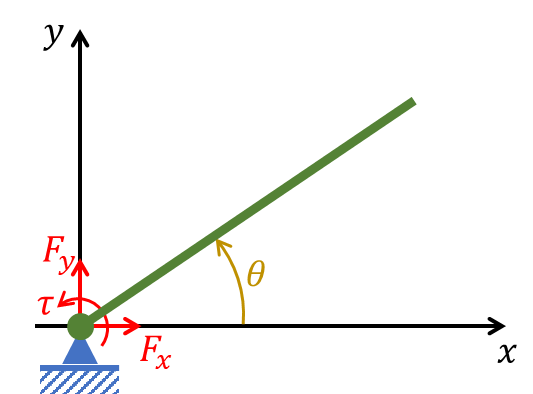

We want to identify the following system parameters of this robot: $m_1$, $J_1$, $x_1$, $y_1$.

* $m_1$: mass of the link
* $J_1$: moment of inertia, around the joint
* $x_1$, $y_1$: position of the center of mass w.r.t. a frame fixed to the link

We executed a motion with the robot and have measurements of:

* the joint position $\theta$, velocity $\omega = \dot{\theta}$ and acceleration $\alpha = \ddot{\theta}$
* the applied torque on the link (by a motor in the joint) $\tau$
* the ground reaction force (i.e. the force the ground applies to the robot) $F_x$ and $F_y$

For this assignment, we assume that there is no noise on the position, velocity and acceleration measurements, and that the noise on the forces and torques is independent and normally distributed with zero mean and standard deviations: $\sigma_{F_x} = \sigma_{F_y} = 0,05 \text{ N}$ and $\sigma_\tau = 0,01 \text{ Nm}$.
The gravitational acceleration is $9,81 \frac{\text{m}}{\text{s}^2}$ in the negative $y$ direction.

Questions:

1. Write down the (planar) equations of motion for this robot as a function of unknown system parameters $m_1$, $J_1$, $x_1$, $y_1$. 

The link is rotated at an angle $theta$. The center of mass of the link is situated at the position $(x_1, y_1)$ in a coordinate system fixed to the link. The position of the COM in the global reference frame is the following: 
* $x = x_{1} \cdot cos(\theta) - y_{1} \cdot sin(\theta)$
* $y = x_{1} \cdot sin(\theta) + y_{1} \cdot cos(\theta)$

The acceleration of the center of mass is $ (\ddot{x}, \ddot{y})$. In order to obtain it in function of the angle magnitude, speed and acceleration, the position of the COM is differentiated by the time.
In this case, it is assume that R is constant. Then, the time derivative of the position guves the speed of the COM.

* $\dot{x} = -x_{1} \cdot sin(\theta) \cdot \omega - y_{1} \cdot cos(\theta) \cdot \omega $ 
* $\dot{y} =  x_{1} \cdot cos(\theta) \cdot \omega - y_{1} \cdot sin(\theta) \cdot \omega $

Then, the accelerations of the COM can be derived.

* $\ddot{x} = x_{1} \cdot \bigg( - cos(\theta) \cdot \omega^2 - sin(\theta) \cdot \alpha \bigg) + y_1 \bigg( sin(\theta) \cdot \omega^2 - cos(\theta) \cdot \alpha \bigg)$ 
* $\ddot{y} = x_{1} \cdot \bigg( - sin(\theta) \cdot \omega^2 + cos(\theta) \cdot \alpha \bigg) + y_1 \bigg(-cos(\theta) \cdot \omega^2 - sin(\theta) \cdot \alpha \bigg)$

The Newton's equations of motion are 

* In x: $\Sigma F = F_x = m_1 \cdot \ddot{x}$
* In y: $\Sigma F = F_y - m_1 \cdot g = m_1 \cdot \ddot{y}$

The Rotational equation of motion is

* $\Sigma Torques = \tau - m_1 \cdot g \cdot [ x_{1} \cdot cos(\theta) - y_{1} \cdot sin(\theta)] = J_1 \cdot \alpha$

Replacing the accelerations by the previous expressions and replacing R by $\sqrt{x^2 + y^2}$, the final version of the equations of motion are the next.

* $F_{x} = m_{1} \cdot \Bigg[ x_{1} \cdot \bigg( - cos(\theta) \cdot \omega^2 - sin(\theta) \cdot \alpha \bigg) + y_1 \bigg( sin(\theta) \cdot \omega^2 - cos(\theta) \cdot \alpha \bigg) \Bigg]$

* $F_{y} - m_{1} \cdot g = m_{1} \cdot \Bigg[ x_{1} \cdot \bigg( - sin(\theta) \cdot \omega^2 + cos(\theta) \cdot \alpha \bigg) + y_1 \bigg(-cos(\theta) \cdot \omega^2 - sin(\theta) \cdot \alpha \bigg) \Bigg]$

* $J_{1} \alpha = \tau - m_{1} \cdot g \cdot \Bigg[ x_{1} \cdot cos(\theta) - y_{1} \cdot sin(\theta)\Bigg] $ 

2. Formulate an optimization problem to estimate $m_1$, $J_1$, $x_1$, $y_1$ (hence: an optimization problem with these system parameters as optimization variables), based on the measurement data given in the attachment, cf. code snippet below showing how to load the data in Python.

The goal of the optimization is to find the variables that fit the best the equations of motion. The cost function chosen is the l2 norm of the errors normed by there standard deviations in order to have relative value instead of absolute. To simplify the problem, it is decided to take the square root away as it doesn't impact the problem. The cost function is written as the sum of squares of the errors divided by their respective $\sigma$ which is expressed the following.

\begin{align}
\min_{x} \sum_{i=0}^{11} \Bigg[ 
    \frac{1}{\sigma_{\tau}^2} \cdot \bigg(- x_{1} \alpha_{[i]} + \tau_{[i]} - x_{0} \cdot g \cdot [ x_{2} \cdot cos(\theta_{[i]}) - x_{3} \cdot sin(\theta_{[i]})] \bigg)^2 \\
    + \frac{1}{\sigma_{Fx}^2} \cdot \bigg(- F_{x[i]} + x_{0} \cdot \Bigg[ x_{2} \cdot \bigg( - cos(\theta_{[i]}) \cdot \omega_{[i]}^2 - sin(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) + x_{3} \bigg( sin(\theta_{[i]}) \cdot \omega_{[i]}^2 - cos(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) \Bigg]\bigg)^2 \\
    + \frac{1}{\sigma_{Fy}^2} \cdot \bigg(-F_{y[i]} + x_{0} \cdot g + x_{0} \cdot \Bigg[ x_{2} \cdot \bigg( - sin(\theta_{[i]}) \cdot \omega_{[i]}^2 + cos(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) + x_{3} \bigg(-cos(\theta_{[i]}) \cdot \omega_{[i]}^2 - sin(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) \Bigg]\bigg)^2 
\Bigg]
\end{align}

\begin{align}
x = [m_1, J_1, x_1, y_1]
\end{align}

3. Is your optimization problem convex? Motivate your answer.

* In order to have a convex problem, it has to respect 3 properties:
    * The cost function must be convex
    * The inequality constraints must be affine
    * The equality constraints must be convex

* In this case, there is no equality constraints and the two constraints on the mass and inertia positivity are well affine.

* Concerning the cost function, it is the $l2$ norm of the EOM's error. To simplify the model, it is decided to take away the square root as it doesn't impact the problem. Then, the function $\sum_{i=0}^{11} \lambda_i \cdot f_{i}(x) \text{ is convex if } \lambda_i > 0 \text{ and } f_{i}(x) \text{ is convex} $
* The next step is then to verify if each sub-function is convex. Every sub-function is actually a composition of two functions $f_{i}(x) = h(g(x))$ where $h(x) = x^2$. It is known that f(x) is convex if:
    * h is convex, h is nondecreasing in each argument and g is convex
    * h is convex, h is nonincreasing in each argument and g is concave

Here, the functions $g_i (x)$ are the three equations of motion. They are all bilinear in $\mathbf{x}$ and therefore their convexity depends on the problem's geometry as shown in the Hessian of each function. 
Thanks to the hessians, it can be concluded that the problem is not convex as the matrices are not definite positive. For example, the eigen values of $\nabla^2 g_\tau$ are $[-g,0,0,g]$ which are positive and negative.


4. Solve this problem using CasADi - Opti with the Ipopt solver. Discuss the results.


In [1]:
import pickle
from casadi import * 
import matplotlib.pyplot as plt
from matplotlib.animation import *
from matplotlib.patches import Circle
from IPython.display import HTML
import numpy as np
with open('robot_system_identification_data.pkl', 'rb') as f:
    data = pickle.load(f)
'''
Equation of motion (translation) in function of the center of the beam.
- m = mass of the pendulum 
- J = moment of inertia around the joint

- Fx = reaction force x-direction
- Fy = reaction force y-direction 
- tau = torque

- theta : angle position : 
- omega : angle velocity 
- omegadot :  angle acceleration 

- g = graviatation acc

- sigma_fx = force standard deviation 
- sigma_fy = ""
- sigma_tau = torque standard deviation 

'''
#Goal: Find the position of the center of mass, m and J in function of the measurements. 
g = 9.81

opti = Opti()
x = opti.variable(4,1)

Fx = (data["fx"])
Fy = (data["fy"])
tau = (data["tau"])
theta = (data["theta"])
omega = (data["omega"])
alpha = (data["alpha"])

sigma_fx = 0.05
sigma_fy = 0.05
sigma_tau = 0.02

f_cost_sum = 0
for i in range(12):
    f_cost_sum += ((tau[i] - x[1]*alpha[i] - x[0]*g*np.cos(theta[i])*x[2] + x[0]*g*np.sin(theta[i])*x[3])/sigma_tau)**2
    f_cost_sum += ((-Fx[i] + x[0]*x[2]*(-np.cos(theta[i])*(omega[i]**2) - alpha[i] * np.sin(theta[i])) + x[0]*x[3]*(np.sin(theta[i])*(omega[i]**2) - alpha[i] * np.cos(theta[i])))/sigma_fx)**2
    f_cost_sum += ((-Fy[i] + x[0]*x[2]*(-np.sin(theta[i])*(omega[i]**2) + alpha[i] * np.cos(theta[i])) + x[0]*x[3]*(-np.cos(theta[i])*(omega[i]**2) - alpha[i] * np.sin(theta[i])) + x[0]*g)/sigma_fy)**2

opti.minimize(f_cost_sum)
# add constraints to have positive weight and inertia
opti.subject_to(x[0] >= 0)
opti.subject_to(x[1] >= 0)
opti.solver("ipopt", {"print_time":False}, {"print_level":0})
opti.set_initial(x, [4.0, 0.5, 0.3, 0.1])

opti.solver('ipopt')
sol = opti.solve()

print(f"Optimal solution: ({sol.value(x)})")

# Optimal solution: ([4.49961357 0.37517128 0.23013285 0.02000032])



FileNotFoundError: [Errno 2] No such file or directory: 'robot_system_identification_data.pkl'

By vectorilizing the variables, the function has been rewritten. By squaring the function, the norm of the function will be calculated (The sqare root is 
not needed in this case, it does not change the result).
As shown here above, it has been tried to minimize the error of the cost function. 

Here are the results we get with the solver:
* m1 = 4.49961357 
* J1 = 0.37517128 
* x1 = 0.23013285
* y1 = 0.02000032

The received result gives as predicted a positive mass and moment of inertia and x and y are also positive. 

In [ ]:
u = MX.sym("u", 4, 1)
v = MX(1,1)
v = 0
for i in range(12):
    v += ((tau[i] - x[1]*alpha[i] - x[0]*g*np.cos(theta[i])*x[2] + x[0]*g*np.sin(theta[i])*x[3])/0.02)**2
    v += ((-Fx[i] + x[0]*x[2]*(-np.cos(theta[i])*(omega[i]**2) - alpha[i] * np.sin(theta[i])) + x[0]*x[3]*(np.sin(theta[i])*(omega[i]**2) - alpha[i] * np.cos(theta[i])))/0.05)**2
    v += ((-Fy[i] + x[0]*x[2]*(-np.sin(theta[i])*(omega[i]**2) + alpha[i] * np.cos(theta[i])) + x[0]*x[3]*(-np.cos(theta[i])*(omega[i]**2) - alpha[i] * np.sin(theta[i])) + x[0]*g)/0.05)**2

#f = Function("f", [u], [v]) 
J = Function("J", [u], [jacobian(v, u)])
jac_sol = J([4.49961357, 0.37517128, 0.23013285, 0.02000032])
print(jac_sol)
H = Function("H", [u], [hessian(transpose(v) @ v, u)[0]])
hes_sol = H([4.49961357, 0.37517128, 0.23013285, 0.02000032])
print(hes_sol)
print(np.linalg.eig(hes_sol)[0])

[[00, 00, 00, 00]]

[[00, 00, 00, 00], 
 [00, 00, 00, 00], 
 [00, 00, 00, 00], 
 [00, 00, 00, 00]]
[0. 0. 0. 0.]


5. Rewrite the problem to use optimization variables $a_1 := m_1x_1$, $b_1 := m_1y_1$ instead of $x_1$ and $y_1$, meaning: the optimization variables should be (and only be) $m_1$, $J_1$, $a_1$, and $b_1$. We can do this as long as $m_1$ is not zero (which is the case).


\begin{align}
x = [m_1, J_1, a_1, b_1]
\end{align}

\begin{align}
\min_{x} \sum_{i=0}^{11} \Bigg[ 
    \frac{1}{\sigma_{\tau}^2} \cdot \bigg(- \mathbf{x}_{1} \cdot \alpha_{[i]} + \tau_{[i]} - g \cdot [ \mathbf{x}_{2} \cdot cos(\theta_{[i]}) - \mathbf{x}_{3} \cdot sin(\theta_{[i]})] \bigg)^2 \\
    + \frac{1}{\sigma_{Fx}^2} \cdot \bigg(- F_{x[i]} + \Bigg[ \mathbf{x}_{2} \cdot \bigg( - cos(\theta_{[i]}) \cdot \omega_{[i]}^2 - sin(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) + \mathbf{x}_{3} \bigg( sin(\theta_{[i]}) \cdot \omega_{[i]}^2 - cos(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) \Bigg]\bigg)^2 \\
    + \frac{1}{\sigma_{Fy}^2} \cdot \bigg(-F_{y[i]} + \mathbf{x}_{0} \cdot g + \Bigg[ \mathbf{x}_{2} \cdot \bigg( - sin(\theta_{[i]}) \cdot \omega_{[i]}^2 + cos(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) + \mathbf{x}_{3} \bigg(-cos(\theta_{[i]}) \cdot \omega_{[i]}^2 - sin(\theta_{[i]}) \cdot \alpha_{[i]} \bigg) \Bigg]\bigg)^2 
\Bigg]
\end{align}

With this variable change, it is easily shown that the problem is now convex.

6. Solve this rewritten problem using CasADi - Opti with the Ipopt solver. Discuss the results. Do you see a difference in problem structure and convergence? Motivate your answer.

In [ ]:
import pickle
from casadi import * 
import matplotlib.pyplot as plt
from matplotlib.animation import *
from matplotlib.patches import Circle
from IPython.display import HTML
import numpy as np
with open('robot_system_identification_data.pkl', 'rb') as f:
    data = pickle.load(f)
#Goal: Find the position of the center of mass, m and J in function of the measurements. 
g = 9.81

opti = Opti()
x = opti.variable(4,1)

Fx = (data["fx"])
Fy = (data["fy"])
tau = (data["tau"])
theta = (data["theta"])
omega = (data["omega"])
alpha = (data["alpha"])


#print("tau:", tau.shape, "theta:", theta.shape, "omega:", omega.shape, "alpha:", alpha.shape, "Fx:",Fx.shape, "Fy:", Fy.shape)

f_cost_sum = 0
for i in range(12):
    f_cost_sum += ((tau[i] - x[1]*alpha[i] - g*np.cos(theta[i])*x[2] + g*np.sin(theta[i])*x[3])/0.02)**2
    f_cost_sum += ((-Fx[i] + x[2]*(-np.cos(theta[i])*(omega[i]**2) - alpha[i] * np.sin(theta[i])) + x[3]*(np.sin(theta[i])*(omega[i]**2) - alpha[i] * np.cos(theta[i])))/0.05)**2
    f_cost_sum += ((-Fy[i] + x[2]*(-np.sin(theta[i])*(omega[i]**2) + alpha[i] * np.cos(theta[i])) + x[3]*(-np.cos(theta[i])*(omega[i]**2) - alpha[i] * np.sin(theta[i])) + x[0]*g)/0.05)**2

opti.minimize(f_cost_sum)
# add constraints to have positive weight and inertia
opti.subject_to(x[0] >= 0)
opti.subject_to(x[1] >= 0)
opti.solver("ipopt", {"print_time":False}, {"print_level":0})
opti.set_initial(x, [4.0, 0.5, 1.2, 0.1])

opti.solver('ipopt')
sol = opti.solve()

print(f"Optimal solution: ({sol.value(x)})")

# Optimal solution: ([4.49961357 0.37517128 0.23013285 0.02000032])



This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        9

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.5435931e+05 0.00e+00 5.58e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 